
# R Terrain Analysis

-----------------------

BIO401-01/598-02 
 
Mar. 29 2021


## REVIEW : Exercise 

write a function to test if a number is a prime number, a natural number that is NOT a multiplication of two smaller numbers. 

## Digital Elevation Model

A digital elevation model is a mathematical representation of earth surface topography. 
We associate each coordate (x,y) with it altitude z. 

gradient can be defined as 

$g = \sqrt{\left(\dfrac{\partial z}{\partial x}\right)^2 + \left(\dfrac{\partial z}{\partial y}\right)^2}$

## Symbolic and Algorithmic Derivatives of Simple Expressions

### Example 

Let $f(x) = x^3$, draw the curve $f(x)$ and the tangent line at x = 2. 

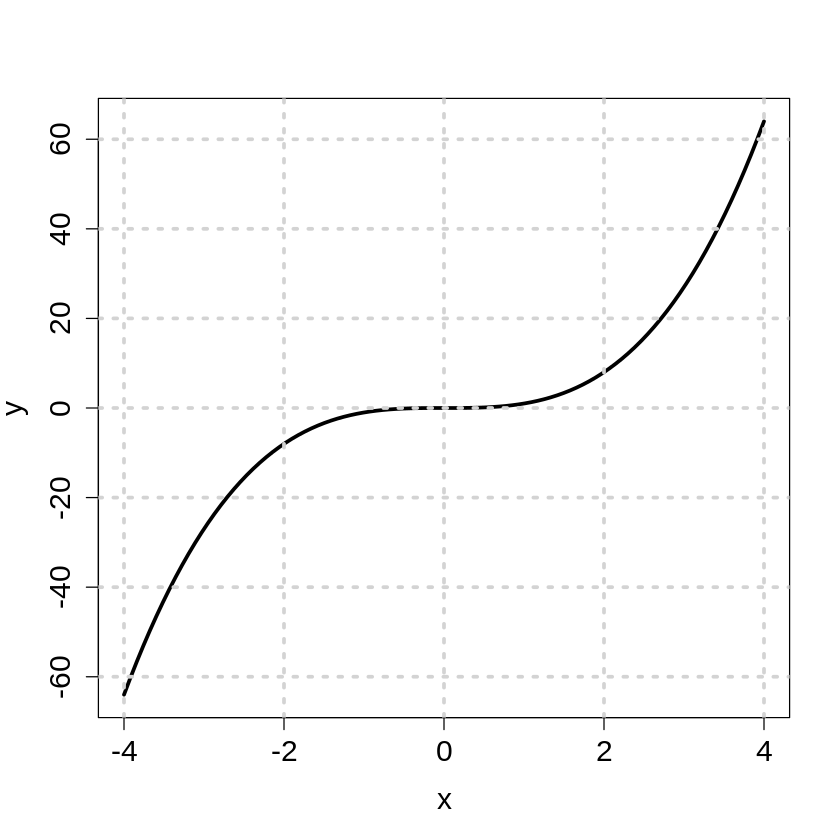

In [8]:
x <- seq(-4,4,length.out=100)
y <- x^3
plot (x,y,type="l",lwd=3,cex.lab=1.5,cex.axis=1.5)
grid(lwd=3)

In [20]:
f <- expression(x^3)
dfdx <- D(f,"x")
dfdx

3 * x^2

In [21]:
x <- 2
eval(dfdx)

[1] 12

In [23]:
eval(x^3)

[1] 8

tangent point (2,8)
slope = dfdx = 12

t = 12 x + b $\Rightarrow$ b = -16

t = 12 x - 16

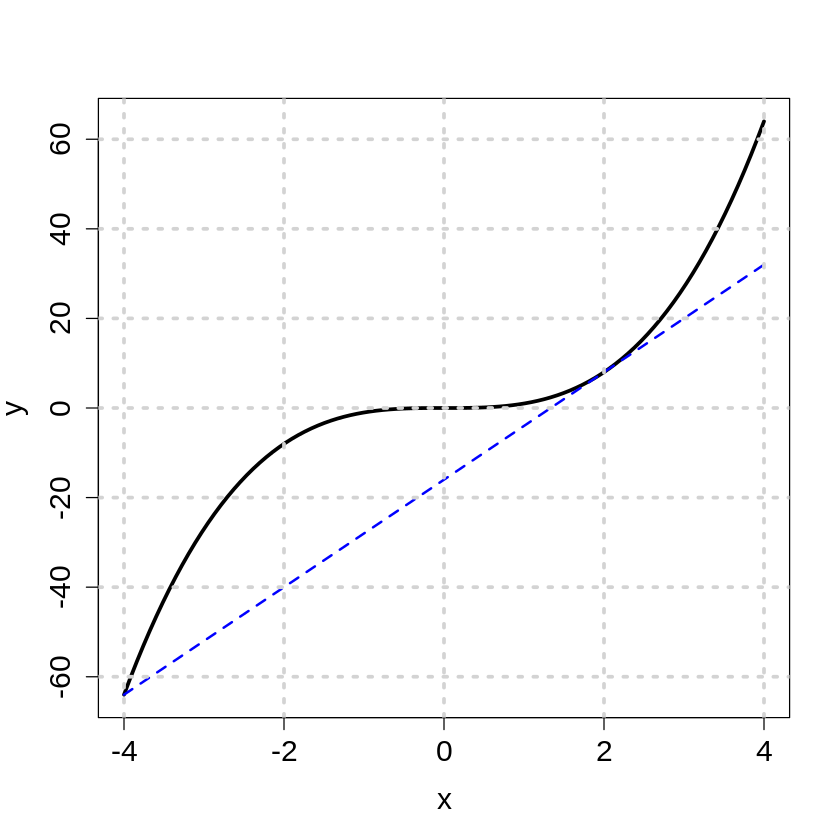

In [31]:
x <- seq(-4,4,length.out=100)
y <- x^3
t <- 12*x - 16
plot (x,y,type="l",lwd=3,cex.lab=1.5,cex.axis=1.5)
lines (x,t,col="blue",lwd=2,lty="dashed")
grid(lwd=3)

### Example : Heat on Earth

The amount of solar heat received on earth can be simulated as a periodic function.

$E(t) = C - C_0\, cos\left(\dfrac{2\pi}{365.25}(t-2.72)\right)$

where $E$ is Joules/day, $t$ are days, $C$ and $C_0$ are constants. 

Questions

(1) On what day of the year, the earth receives the solar energy most? 

(2) What times of the year does the hear increases the most? 

answer for (1)

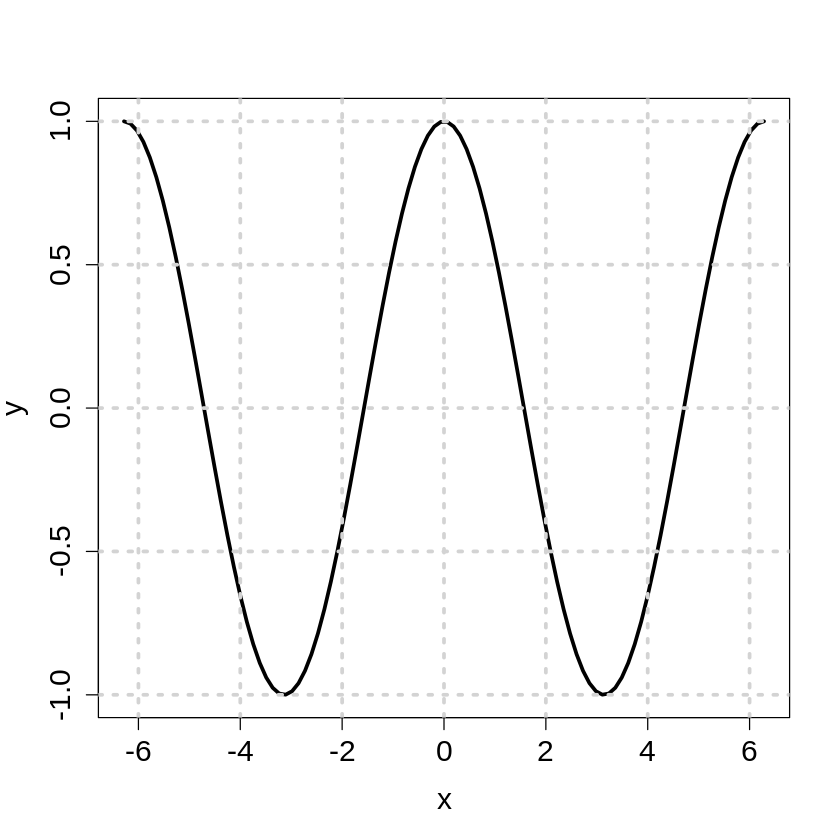

In [32]:
x <- seq(-2*pi,2*pi,length.out=100)
y <- cos(x)
plot (x,y,type="l",lwd=3,cex.lab=1.5,cex.axis=1.5)
grid(lwd=3)

In [43]:
t <- seq(0,366)
E <- function (t,C,C_0) C - C_0 * cos(2*pi/365.25*(t-2.72))

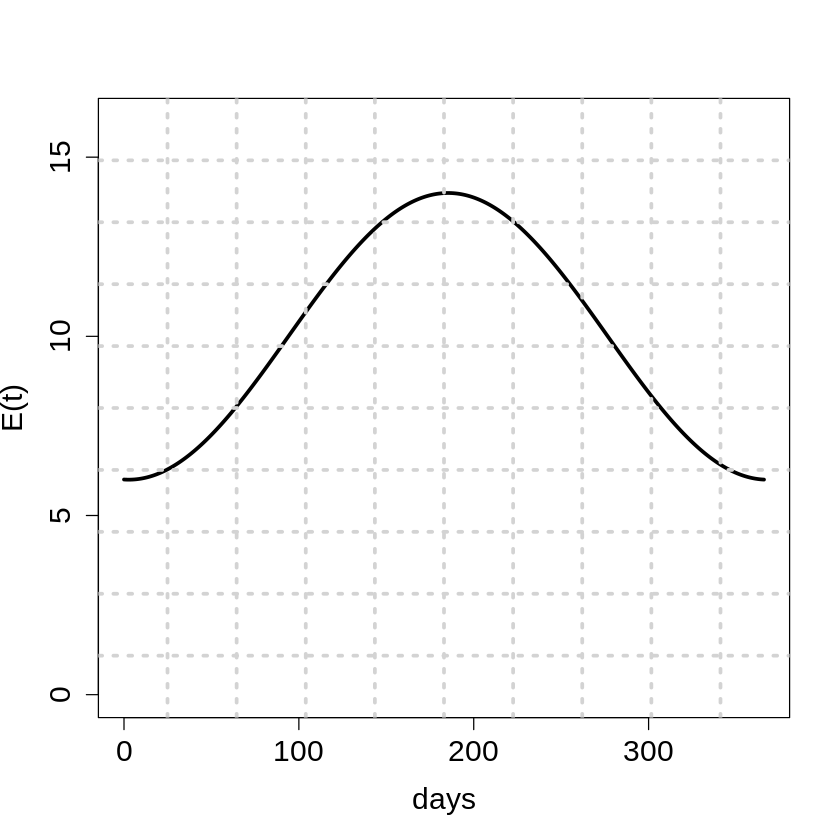

In [49]:
plot (t,E(t,10,4),type="l",lwd=3,cex.lab=1.5,cex.axis=1.5,ylab="E(t)",xlab="days",ylim=c(0,16))
grid(lwd=3,nx=10)

In [51]:
f <- expression(C - C_0 * cos(2*pi/365.25*(t-2.72)))
dfdx <- D(f,"t")
dfdx

C_0 * (sin(2 * pi/365.25 * (t - 2.72)) * (2 * pi/365.25))

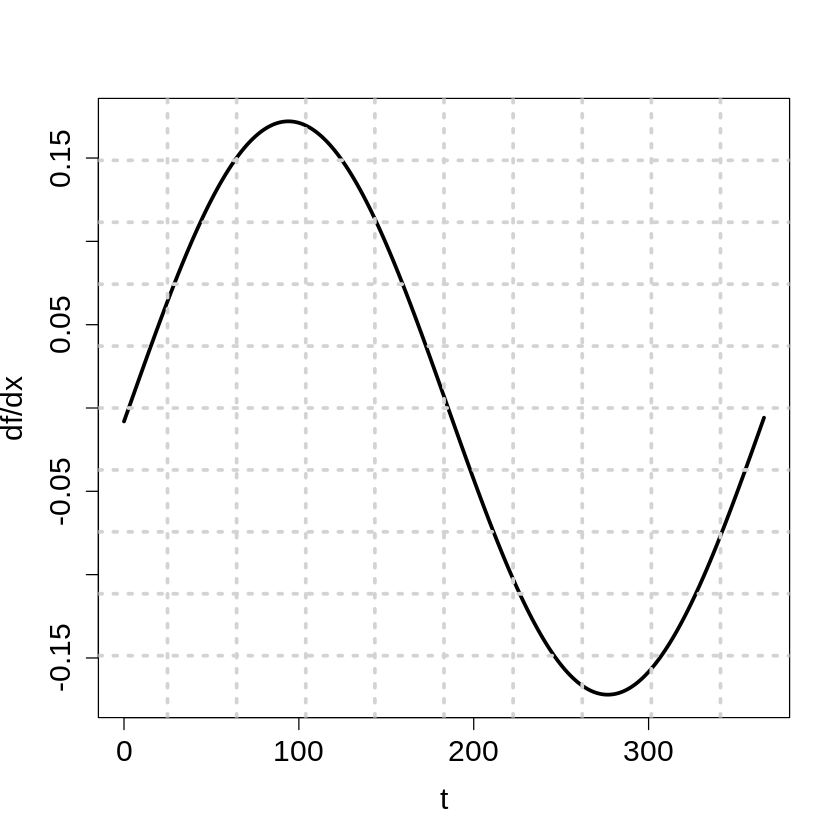

In [59]:
t <- seq(0,366)
C_0 <- 10 
plot(t,eval(dfdx),type="l",lwd=3,cex.lab=1.5,cex.axis=1.5,ylab="df/dx",xlab="t")
grid(lwd=3,nx=10)

dfdx = 0

t=2.27 or t=$\pi$/2 + 2.72

create a function for higher order derivatives 

In [61]:
DD <- function(expr, name, order = 1) {
   if(order < 1) stop("'order' must be >= 1")
   if(order == 1) D(expr, name)
   else DD(D(expr, name), name, order - 1)
}

In [70]:
DD(expression(sin(x)),"x",2)

-sin(x)

In [71]:
f <- expression(C - C_0 * cos(2*pi/365.25*(t-2.72)))
df2dx <- DD(f,"t",2)
df2dx

C_0 * (cos(2 * pi/365.25 * (t - 2.72)) * (2 * pi/365.25) * (2 * 
    pi/365.25))

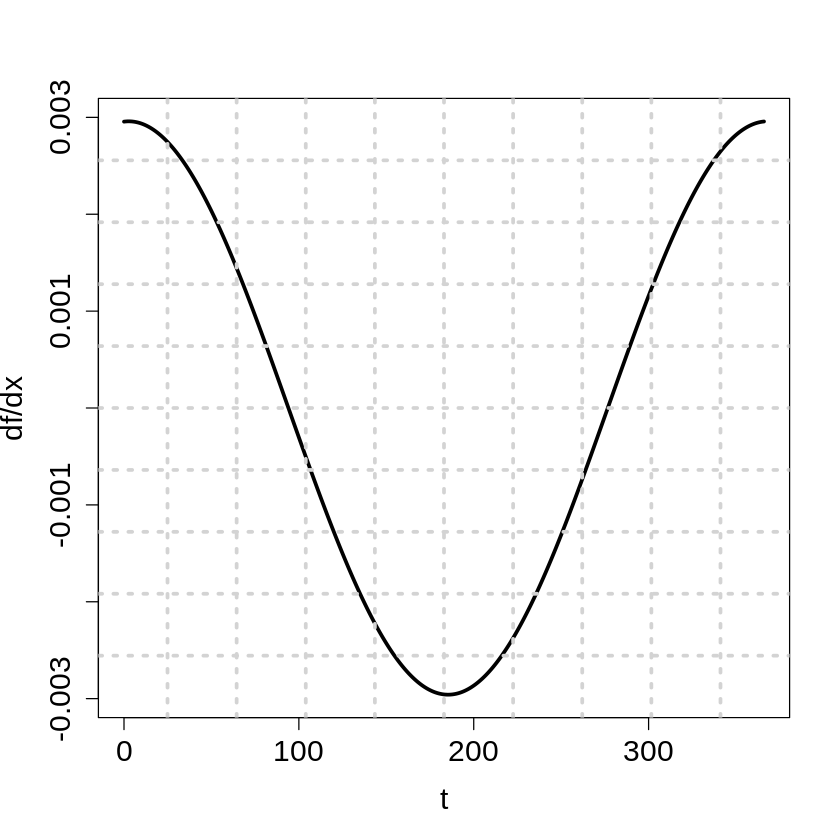

In [72]:
t <- seq(0,366)
C_0 <- 10 
plot(t,eval(df2dx),type="l",lwd=3,cex.lab=1.5,cex.axis=1.5,ylab="df/dx",xlab="t")
grid(lwd=3,nx=10)

So : 

t=$\pi$/2 + 2.72 correponds to the max energy reception 

answer for (2)

Rate of increase of function E is determined by $E^\prime$. 

To find out maximum $E^\prime$, we need compute $E^{\prime\prime}$.

$cos\left(\dfrac{2 \pi}{365.25}  (t - 2.72)\right) = 0 $

i.e. 

$\dfrac{2 \pi}{365.25}  (t - 2.72) = \dfrac{\pi}{2} \Rightarrow t = \dfrac{365.25}{4} + 2.721$

or 

$\dfrac{2 \pi}{365.25}  (t - 2.72) = \dfrac{3 \pi}{2} \Rightarrow t = \dfrac{3\times365.25}{4} + 2.721$


### Example : soil temperature

Soil temperature varies with soil depth (z) and the time of day (t). 

$T(z,t) = T_0\, \exp(-\lambda z)\, sin(24 t - \lambda z)$

where $T_0$ and $\lambda$ are parameters 

Compute and interprete the partial derivatives $\dfrac{\partial T}{\partial z}$ and $\dfrac{\partial T}{\partial t}$

In [77]:
f <- expression(T_0*exp(-lambda*z)*sin(24*t - lambda*z))
dfdx <- D(f,"z")
dfdx

-(T_0 * exp(-lambda * z) * (cos(24 * t - lambda * z) * lambda) + 
    T_0 * (exp(-lambda * z) * lambda) * sin(24 * t - lambda * 
        z))

In [78]:
f <- expression(T_0*exp(-lambda*z)*sin(24*t - lambda*z))
dfdx <- D(f,"t")
dfdx

T_0 * exp(-lambda * z) * (cos(24 * t - lambda * z) * 24)